In [ ]:
# Importing Necessary Libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Reading the File.
titanic_data = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
# Viewing few rows of data.
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#number of columns and rows
titanic_data.shape

(891, 12)

In [ ]:
# Data Information.
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# drop the "Cabin column from the frame"
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [ ]:
# replace the missing values with mean values in the "Age" column
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [ ]:
# find most repetting value of the embarked column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
# replace the missing values in embarked column with mode value found
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [ ]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Getting the statistical Data Description
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# find the number of people who survived or not survived
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
# Finding the missing values in dataset.
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
sns.set()

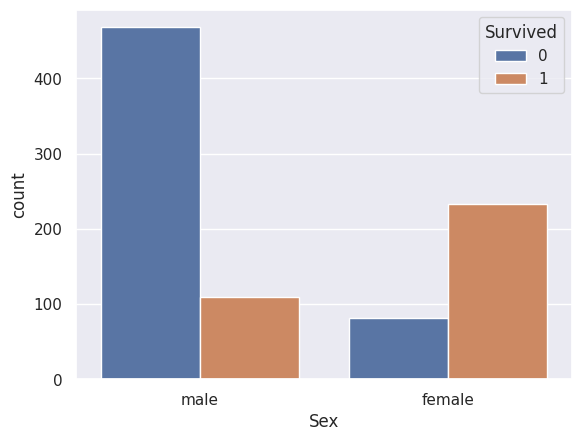

In [ ]:
# Creating Bar Plot.
sns.set()
sns.countplot(x=titanic_data['Sex'], hue=titanic_data['Survived'])
plt.show()

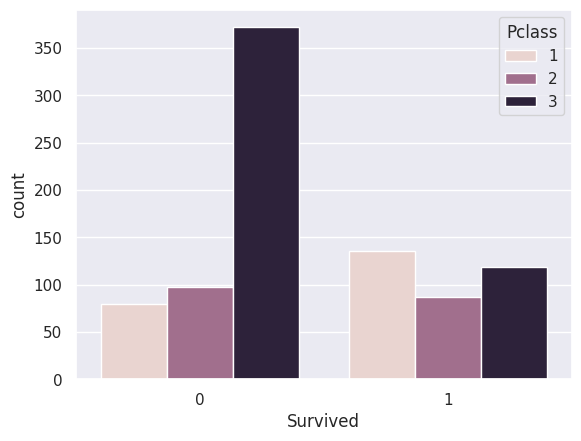

In [ ]:
# Creating Bar Plot.
sns.countplot(x=titanic_data['Survived'], hue=titanic_data['Pclass'])
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

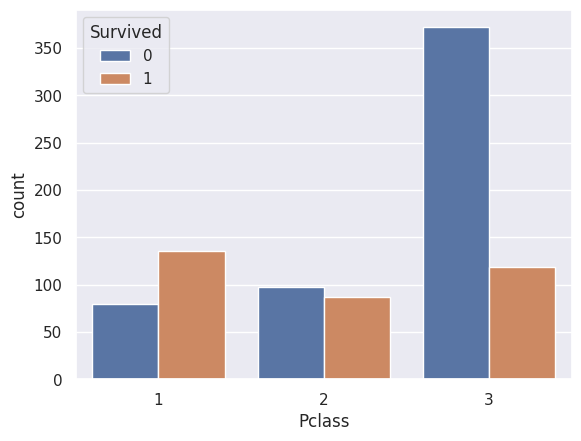

In [ ]:
# Creating Bar Plot.
sns.countplot(x=titanic_data['Pclass'], hue=titanic_data['Survived'])

In [ ]:

# Dropping a Coloumn.
X = titanic_data.drop(['Survived'], axis=1)

# Selecting Features
X = titanic_data[['Pclass','Sex']].copy()

# Selecting Target Variable
y = titanic_data['Survived']

# Encoding Categorical Variables.
le = LabelEncoder()
X['Sex']= le.fit_transform(X['Sex'])

# Splitting the Data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Initializing and Training the Model.
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print(X)

     Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0         3    male  22.000000      1      0   7.2500        S
1         1  female  38.000000      1      0  71.2833        C
2         3  female  26.000000      0      0   7.9250        S
3         1  female  35.000000      1      0  53.1000        S
4         3    male  35.000000      0      0   8.0500        S
..      ...     ...        ...    ...    ...      ...      ...
886       2    male  27.000000      0      0  13.0000        S
887       1  female  19.000000      0      0  30.0000        S
888       3  female  29.699118      1      2  23.4500        S
889       1    male  26.000000      0      0  30.0000        C
890       3    male  32.000000      0      0   7.7500        Q

[891 rows x 7 columns]


In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
y_pred = lr.predict(X_test)
print(y_pred)

[1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0
 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0
 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0
 1 0 0 0 1 1 0 0 1]


In [ ]:
# Importing the Accuracy Score Metric.
from sklearn.metrics import accuracy_score

# Calculating and Printing the Accuracy Score.
acc = accuracy_score(y_test, y_pred)
print("Accuracy score(in precent):", acc*100)

# Importing Additional Metrics.
from sklearn.metrics import classification_report, confusion_matrix

# Generating and Printing the Classification Report.
clreport = classification_report(y_test, y_pred)
print("Classification Report:", clreport)

Accuracy score(in precent): 78.73134328358209
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.83      0.82       156
           1       0.75      0.73      0.74       112

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [ ]:
# Importing the Confusion Metric.
from sklearn.metrics import confusion_matrix

# Creating Confustion Matrix.
confmatrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", confmatrix)

Confusion Matrix: [[129  27]
 [ 30  82]]


In [ ]:
# Making the Prediction.
pred_result = lr.predict([[2,1]])
if(pred_result==0):
  print("Did not survive")
else:
  print("Survived")

Did not survive


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
